## <center> **Importing the <span style="color: red">Packeges</span>**

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import panel as pn
from scipy import stats
import sqlite3
import pickle
# from numba import jit

from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
THEME_COLORS = ["#383838", "#ff0000"]
NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
FONT = 13

# set_matplotlib_formats('pdf', 'svg')

## <center> **Reading and simple <span style="color: red">exploring</span>**

In [4]:
con = sqlite3.connect('../database.db')

df = pd.read_sql_query("""-- The outuput of this querry will be assigned to
                          -- `df` variable.

                          SELECT *
                          FROM base_videos
                          INNER JOIN base_channels ON
                          channelTitle = channel_name""", con)

con.close()

This data frame is a temporary combination for this notebook only to explore the statics for<br>
our data.

In [5]:
df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,definition,duration_in_minutes,channel_name,subscribers,total_views,date,video_count,about,country
13490,ZiiCk9qEIow,IJustWantToBeCool GAMING,UPPTÄCKER DEN STÖRSTA GROTTAN I FOREST,Vår podcast Vad? Med IJustWantToBeCool har off...,"['IJustwanttobecoolgaming', 'I just want to be...",2023-03-18 08:00:23+00:00,46053,1647,138,hd,13.781250,IJustWantToBeCool GAMING,148000,49862753,2020-06-05 00:00:00,202,,SE
17340,GVLiCP_eAWA,LAMI GAMING,AUSBRUCH aus OHIO HOTEL! (Roblox),AUSBRUCH aus OHIO HOTEL! (Roblox)\n💥 STARCODE:...,"['Lami', 'roblox', 'roblox lami', 'roblox deut...",2023-03-14 17:15:00+00:00,20904,572,106,hd,15.218750,LAMI GAMING,36700,7848593,2022-07-28 00:00:00,151,Der neue Kanal von LAMI!\n\nHier findest du je...,DE
17552,LauKn30_zGY,Mortismal Gaming,Check Out: Have A Nice Death,Talking about some of what you can expect from...,"['Mortym', 'Mortismal Gaming', 'have a nice de...",2023-03-23 11:00:13+00:00,17852,1179,51,hd,6.449219,Mortismal Gaming,168000,35669109,2015-10-31 00:00:00,1153,This channel is dedicated to gaming and hopefu...,US
15884,Zb23bkx4ZDA,Jacob Gaming,HOW did I NOT DIE FROM THIS...,Download PUBGM here: https://pubgmobile.live/2...,"['Pubgm', 'Pubg', 'Pubg Mobile', 'FakeJacob', ...",2023-04-07 05:00:26+00:00,25953,1500,11,hd,0.383301,Jacob Gaming,479000,394324624,2020-02-24 00:00:00,1052,Pushing the limits of Mobile Gaming Content an...,US
988,UP_xniSipb8,Sopo Squad Gaming,My Dad Surprises Me with Adopt Me Plush Eggs! ...,Cammy Gets a MEGA Surprise in Roblox Adopt Me!...,"['Adopt me', 'Roblox adopt me', 'Rblx', 'Adopt...",2023-02-19 14:13:39+00:00,72614,1687,473,hd,9.414062,Sopo Squad Gaming,1110000,284990998,2019-06-20 00:00:00,575,Roblox gaming family!! It's the Sopo Squad! Wa...,US


In [6]:
cm = sns.light_palette(THEME_COLORS[1], as_cmap=True)
df.select_dtypes(NUMERICS).sample(6).style.background_gradient(cmap=cm)

,viewCount,likeCount,commentCount,duration_in_minutes,subscribers,total_views,video_count
1876,1897,142,12,178.750000,18700,2301311,564
9727,2302,187,4,44.531250,32700,2290963,179
9553,340,48,1,169.375000,2510,241846,590
6469,43456,3013,124,8.570312,282000,22968097,464
5689,22240,514,41,37.812500,150000,45286154,788
251,6839,46,2,11.898438,194000,69932060,1849


In [7]:
cm = sns.light_palette(THEME_COLORS[1], as_cmap=True)
df.describe().style.background_gradient(cmap=cm)

,viewCount,likeCount,commentCount,duration_in_minutes,subscribers,total_views,video_count
count,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000
mean,360349.763170,11811.349997,407.953316,46.647296,1135767.049113,262671207.996329,988.942822
std,2711722.219970,64863.755746,1959.320592,89.616236,3166012.300229,656386437.446411,1152.973225
min,1.000000,1.000000,1.000000,0.000000,61.000000,1.000000,1.000000
25%,3372.000000,140.000000,9.000000,7.000000,49400.000000,7848593.000000,260.000000
50%,24777.000000,1206.000000,63.000000,13.570312,236000.000000,45433503.000000,559.000000
75%,136209.000000,5815.500000,260.000000,31.640625,863000.000000,189310658.000000,1263.000000
max,119872567.000000,1787829.000000,57276.000000,1928.000000,34700000.000000,5648937017.000000,7136.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             19343 non-null  object 
 1   channelTitle         19343 non-null  object 
 2   title                19343 non-null  object 
 3   description          19343 non-null  object 
 4   tags                 19343 non-null  object 
 5   publishedAt          19343 non-null  object 
 6   viewCount            19343 non-null  int64  
 7   likeCount            19343 non-null  int64  
 8   commentCount         19343 non-null  int64  
 9   definition           19343 non-null  object 
 10  duration_in_minutes  19343 non-null  float64
 11  channel_name         19343 non-null  object 
 12  subscribers          19343 non-null  int64  
 13  total_views          19343 non-null  int64  
 14  date                 19343 non-null  object 
 15  video_count          19343 non-null 

In [9]:
print(f"The data consumation here is: {df.memory_usage(deep= True).sum() // 1024 ** 2} MB")

The data consumation here is: 83 MB


Now we just need to convert `date col` & `publishedAt` col into *date-time* ones

In [10]:
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df["date"] = pd.to_datetime(df["date"])

## <strong><center>Visualizing the data<span style= "color: red"> statistics</span>

#### *Distrbution tests*

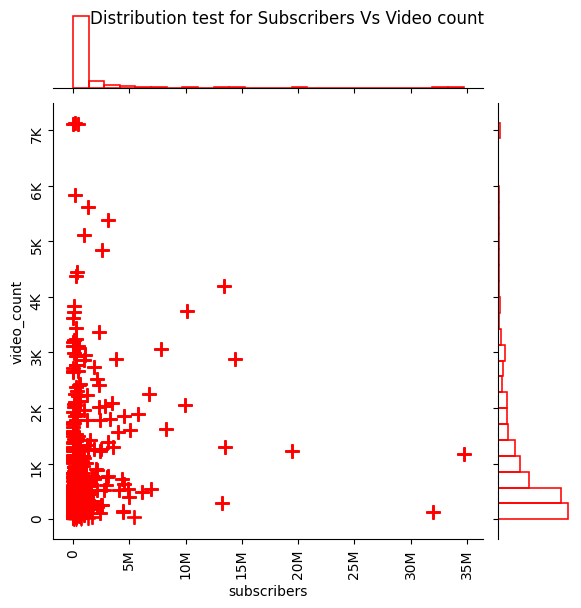

In [16]:
def format_ticks(tick_value, pos):
    if tick_value >= 1e6:
        return f'{tick_value / 1e6:.0f}M'
    elif tick_value >= 1e3:
        return f'{tick_value / 1e3:.0f}K'
    else:
        return int(tick_value)

# Create the joint plot
fig = sns.jointplot(data=df, x="subscribers", y="video_count",
                    color= THEME_COLORS[1],
                    marker="+", s=100,
                    marginal_kws=dict(bins=25, fill=False))

fig.fig.suptitle('Distribution test for Subscribers Vs Video count')

# Apply the custom tick formatter to X and Y axes
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.savefig("../plots/subs_vs_video_count_hist_scatter.svg")
plt.show()

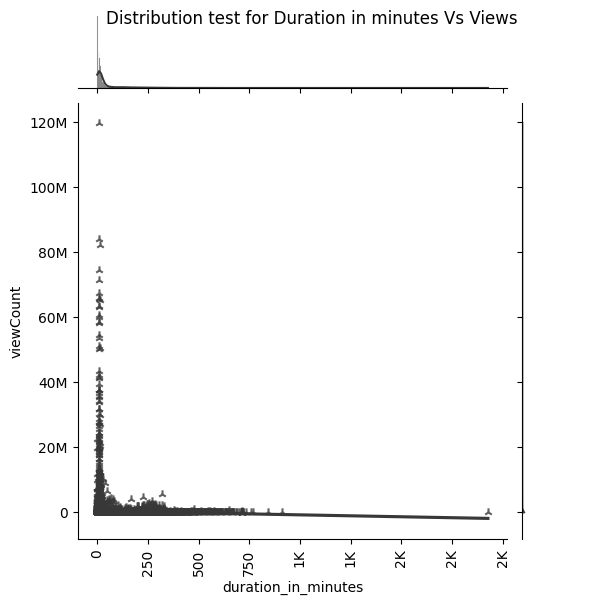

In [17]:
# sns.jointplot(data= df, x= "duration_in_minutes", y="viewCount", kind="reg")

fig = sns.jointplot(data= df, x= "duration_in_minutes", y= "viewCount",
              color= THEME_COLORS[0], kind="reg",
              marker= "2")

fig.fig.suptitle("Distribution test for Duration in minutes Vs Views")


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))


plt.xticks(rotation=90)
plt.yticks(rotation= 0)
plt.savefig("../plots/dur_vs_views_reg_plot.svg")
plt.show()

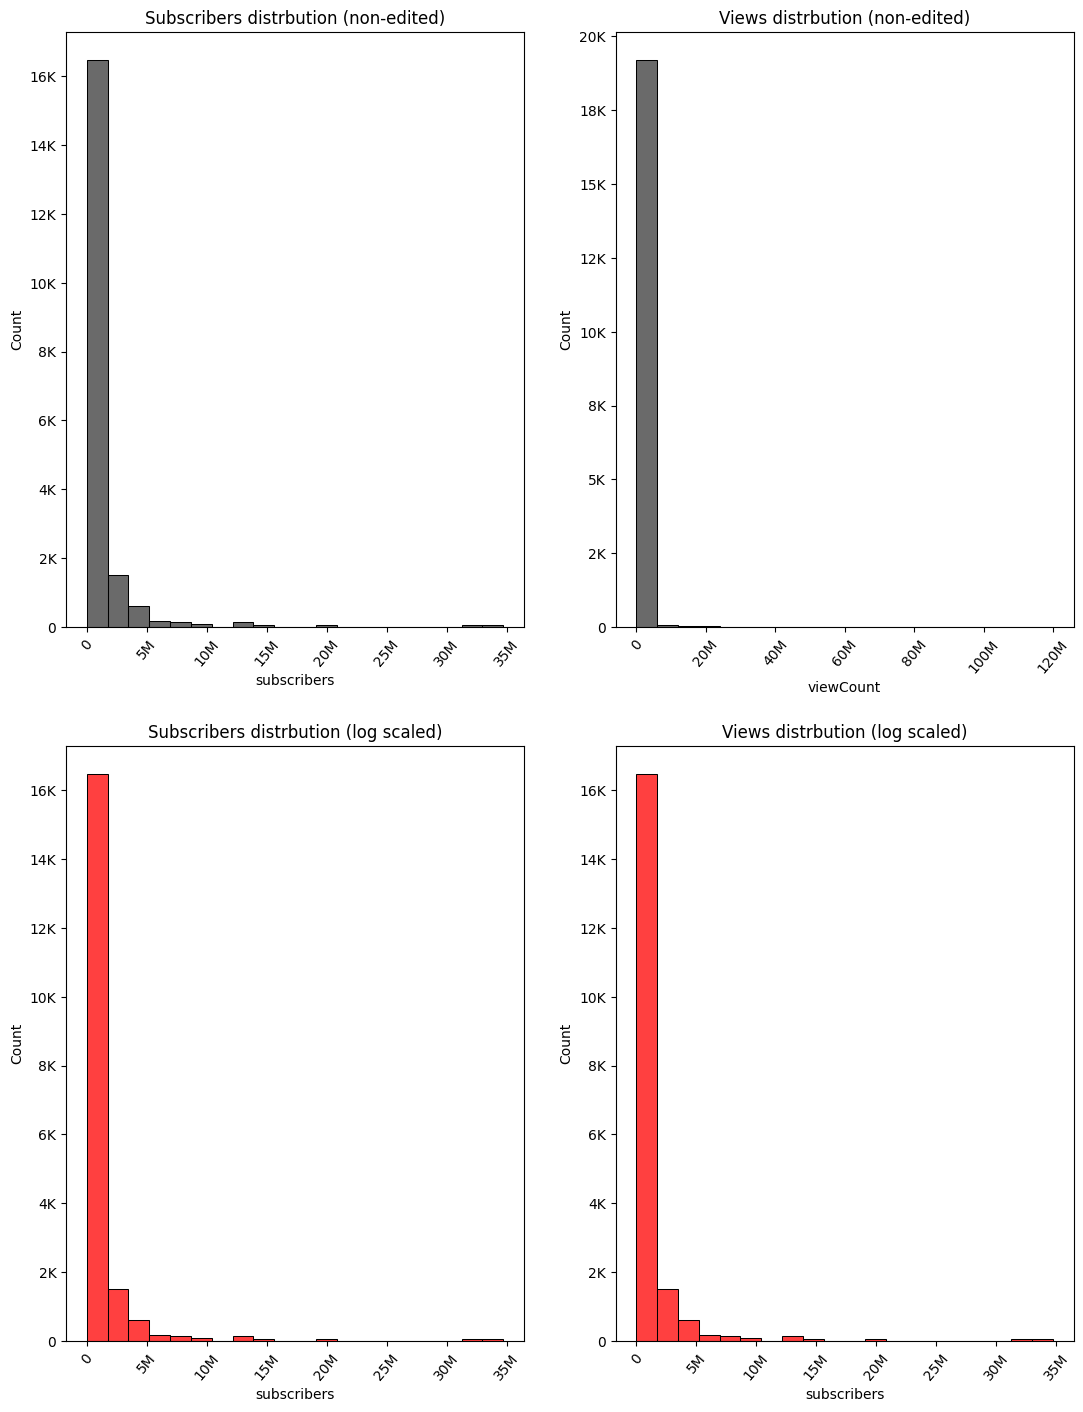

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows= 2, ncols= 2)

sns.histplot(data= df, x= "subscribers", ax= ax1, bins= 20, color= THEME_COLORS[0]).set_title(
    "Subscribers distrbution (non-edited)")

sns.histplot(data= df, x= "viewCount", ax= ax2, bins= 20, color= THEME_COLORS[0]).set_title(
    "Views distrbution (non-edited)")

sns.histplot(data= df, x= "subscribers", ax= ax3, bins= 20, color= THEME_COLORS[1]).set_title(
    "Subscribers distrbution (log scaled)")
    
sns.histplot(data= df, x= "subscribers", ax= ax4, bins= 20, color= THEME_COLORS[1]).set_title(
    "Views distrbution (log scaled)")


for ax in [ax1, ax2, ax3, ax4]:

    ax.ticklabel_format(style='plain', axis='y')
    ax.ticklabel_format(style='plain', axis='x')

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

    for tick in ax.get_xticklabels():
        tick.set_rotation(50)



fig.set_size_inches(13, 17)
plt.savefig("../plots/distrbutions_before_and_after_log_scaling.svg")
plt.show()

#### *Bias checking*

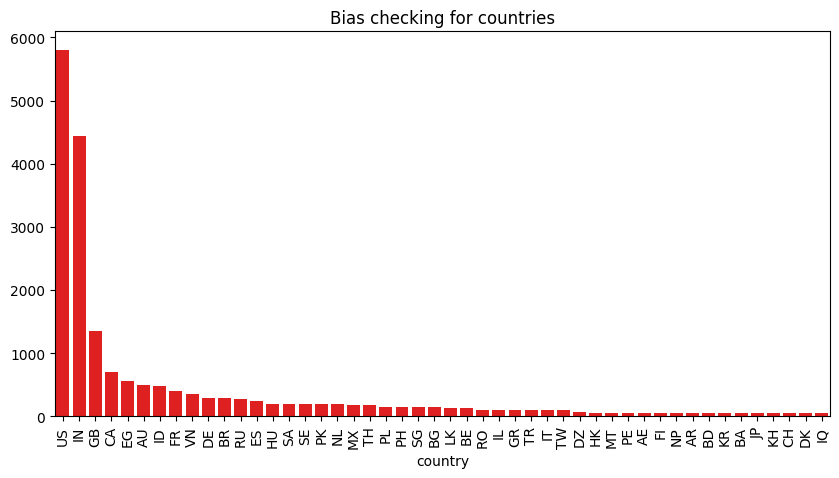

In [26]:
fig, ax = plt.subplots(1)
country_counts = df['country'].value_counts()

sns.barplot(x= country_counts.keys(), y= country_counts.values,
            color= THEME_COLORS[1], ax= ax)

ax.set_title("Bias checking for countries")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.savefig("../plots/countries_count.svg")
fig.set_size_inches(10, 5)
plt.show()

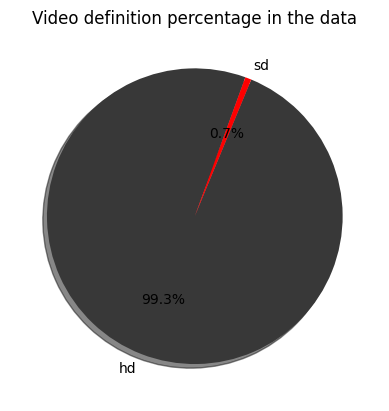

In [27]:
definition_counts = df["definition"].value_counts()

plt.pie(labels= definition_counts.keys(),
        x= definition_counts.values,
        colors= THEME_COLORS, autopct='%.1f%%', 
        shadow= True, startangle= 70)

plt.savefig("../plots/video_definition_percentage.svg")
plt.title("Video definition percentage in the data")
plt.show()

#### *Correlation and outliers analysis*

Found 2523 outliers from 19343 length series!


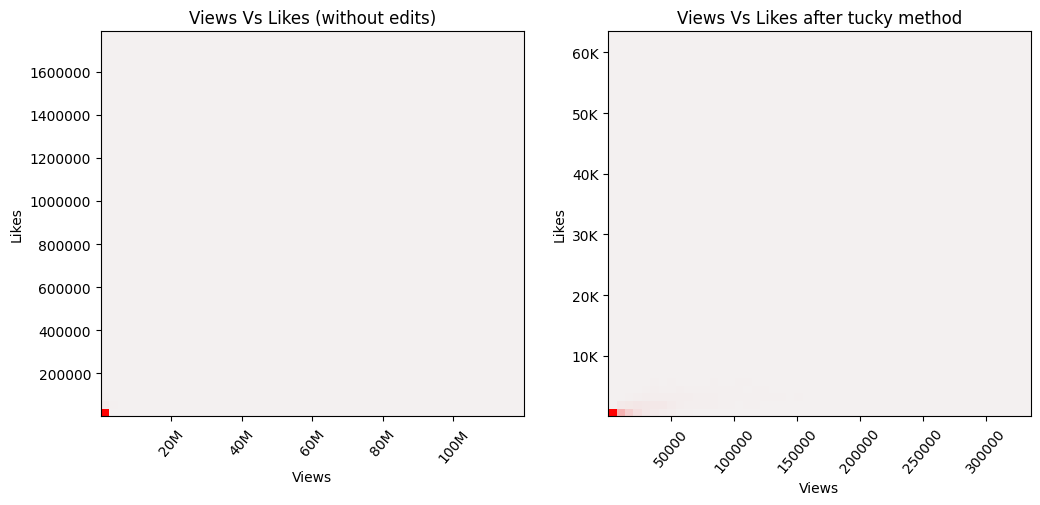

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cm = sns.light_palette(THEME_COLORS[1], as_cmap=True)

# ---------------First axes-----------------
ax1.hist2d(df["viewCount"], df["likeCount"], density= True, cmap= cm,
           bins= 50)

ax1.set_title("Views Vs Likes (without edits)")
ax1.ticklabel_format(style='plain', axis='y')
ax1.ticklabel_format(style='plain', axis='x')

for tick in ax1.get_xticklabels():
    tick.set_rotation(50)
    
ax1.set_xlabel("Views")
ax1.set_ylabel("Likes")
# -----------------------------------------


# ----------------Second axes----------------
outliers = tucky_method(df["viewCount"].to_numpy())
outliers_indexes = np.array(*np.where(np.isin(df["viewCount"], outliers)))
no_outliers_df = df.drop(outliers_indexes)

ax2.hist2d(no_outliers_df["viewCount"], no_outliers_df["likeCount"], density= True, cmap= cm,
           bins= 50)

ax2.set_title("Views Vs Likes after tucky method")
ax2.set_xlabel("Views")
ax2.set_ylabel("Likes")

ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

for tick in ax2.get_xticklabels():
    tick.set_rotation(50)
# -----------------------------------------


fig.set_size_inches(12, 5)
plt.savefig("../plots/views_vs_likes_2D_hist.svg")
plt.show()

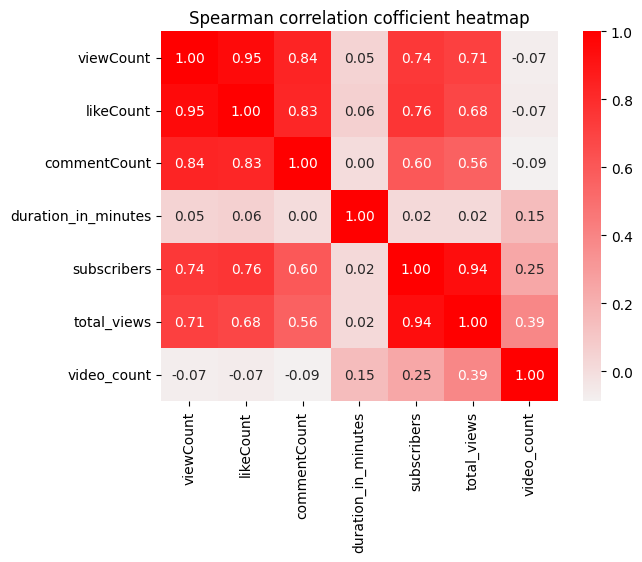

In [31]:
corr = df.corr(numeric_only= True, method= "spearman")
cm = sns.light_palette(THEME_COLORS[1], as_cmap=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap= cm)
plt.title("Spearman correlation cofficient heatmap")

plt.savefig("../plots/spear_man_corr_heatmap.svg")
plt.show()

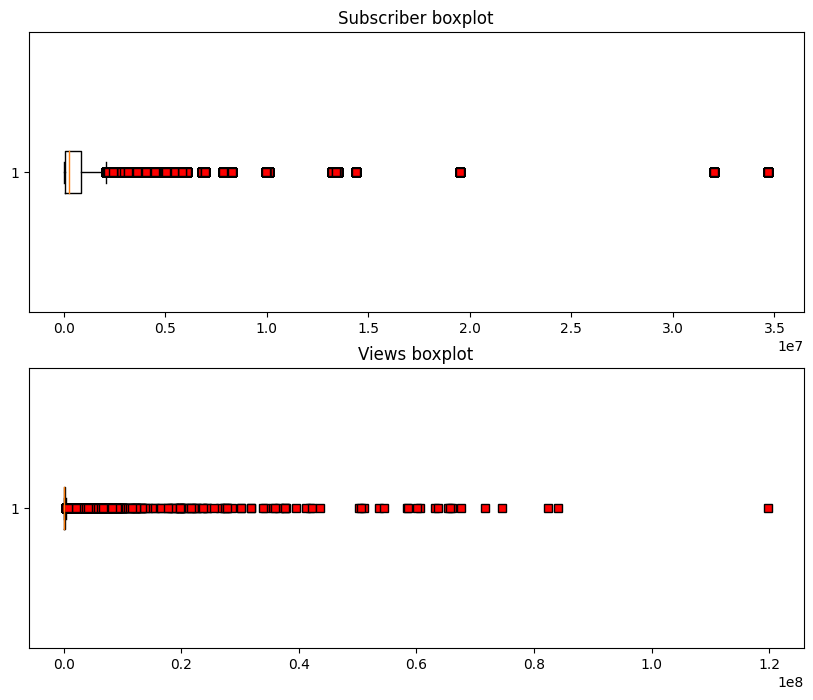

In [32]:
fig, (ax1, ax2) = plt.subplots(2)
green_diamond = dict(markerfacecolor= THEME_COLORS[1], marker='s')


ax1.set_title('Subscriber boxplot')
ax1.boxplot(df["subscribers"], vert=False, flierprops=green_diamond)


ax2.set_title('Views boxplot')
ax2.boxplot(df["viewCount"], vert=False, flierprops=green_diamond)

plt.savefig("../plots/subs_and_views_box_plot.svg")
fig.set_size_inches(10, 8)
plt.show()

## <center><strong><span style= "color: red">Outliers</span> detection algorithm

**Important note**: We will just right the algorithm that we will use and detect the outliers<br>
(not dropping them) we will just view them and save this function to use later.<br>
Here we will just view it's performance compared to other algorithms and save the best.

#### **Hampel filter**

We will use hampal filter algorithm you can find more [**Here**](https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d) and here's it's theory:<br>
$H_i = median(|x_j - x_i|): j ∈ [i - k, i + k]$<br>
where $k$ is a constant usually equalls the scale factor for the gussian distbution<br>
which equalls $1.4826$

In [96]:
test_col = df["viewCount"].to_numpy()
test_col = test_col[test_col < test_col.max() / 10]
# we will use this column as test for our algorithms performances

In [97]:
# @jit(nopython= True)
def hampel_filter(array: np.array, window_size: int, n_sigmas: int= 3) -> list:
    """
    This function takes an array-like numerical object with
    window size, sigmas count to get the outliers of the
    array
    
    :Params: series: list-like
             window_size: int
             n_sigmas: int (default is 3)
             
    :Returns: indices: list (indexes of the founded outliers)
    """
    
    n: int = len(array)
    K: float = 1.4826
    indices = []
    
    for i in range((window_size),(n - window_size)):
        
        x0 = np.median(array[(i - window_size):(i + window_size)])
        S0 = K * np.median(np.abs(array[(i - window_size):(i + window_size)] - x0))
        
        if (np.abs(array[i] - x0) > n_sigmas * S0):
            indices.append(i)
    
    print(f"Found {len(indices)} outliers from {len(array)} length series!")
    
    return indices

In [98]:
hampel_indices = hampel_filter(test_col, window_size= 10, n_sigmas= 3)
hampel_outliers = test_col[hampel_indices]

Found 4512 outliers from 19258 length series!


In [99]:
print(f" The standard deviation of the original column is: {np.std(test_col):.0f}\n",
      f"But now it's {np.std(np.setdiff1d(test_col, hampel_outliers)):.0f}")

 The standard deviation of the original column is: 717265
 But now it's 65529


This means that this algorithm cutted down the STD of the test column into it's half<br>
with just dropping  less than it's quarter.

#### **Tucky method**

Now we will try [**Tucky method**](https://www.google.com) it's strong algorithm so it's not good for limited data<br>
but we will try it and here's it's theory:<br>
$Upper\;limit = Q3 + (IQR\times1.5)$<br>
$Lower\;limit = Q1 - (IQR\times1.5)$<br><br>
any higher number than Upper limit is dropped and vica versa.

In [100]:
# @jit
def tucky_method(array: np.array, indecies= True) -> np.array:
    """
    This function works with any list-like numerical object
    (don't work with pandas series's) and returns the indexes
    of the found outliers in the array.
    
    :Params: Takes only the series.
    :Returns: S list of the outliers indexes.
    """
    
    Q3 = np.quantile(array, 0.75)
    Q1 = np.quantile(array, 0.25)
    IQR = Q3 - Q1
    
    upper_range = Q3 + (IQR * 1.5)
    lower_range = Q1 - (IQR * 1.5)
    
    outliers = [x for x in array if ((x < lower_range) | (x > upper_range))]
    print(f"Found {len(outliers)} outliers from {len(array)} length series!")
    
    return outliers

In [101]:
tucky_outliers = tucky_method(test_col)
tucky_indices = np.array(*np.where(np.isin(test_col, tucky_outliers)))

Found 2493 outliers from 19258 length series!


In [102]:
print(f" The standard deviation of the original column is: {np.std(test_col):.0f}\n",
      f"But now it's {np.std(np.setdiff1d(test_col, tucky_outliers)):.0f}")

 The standard deviation of the original column is: 717265
 But now it's 77001


#### **$\textbf{Z}$-score method**

Z-score outlier detection method is very soft method that tries to drop the most<br>
of the strong outliers only and here's it's theory:<br>
$Upper\;limit = \mu + (3\times\sigma)$<br>
$Lower\;limit = \mu - (3\times\sigma)$

In [103]:
# @jit
def z_score(array, indecies= True) -> np.array:
    """
    This function uses Z-score outlier detection method
    to detect outliers and return them into array.

    :Params: array: list-like numerical object
    :Returns: outliers: np.array (array of the outliers)
    """
    
    std: float = array.std()
    mean: float = array.mean()
    
    upper_limit = mean + (3 * std)
    lower_limit = mean - (3 * std)

    outliers = [value for value in array if 
        (value > upper_limit) | (value < lower_limit)]

    print(f"Found {len(outliers)} outliers from {len(array)} length series!")

    return outliers

In [104]:
z_score_outliers = z_score(test_col)
z_score_indices = np.array(*np.where(np.isin(test_col, z_score_outliers)))

Found 331 outliers from 19258 length series!


In [105]:
print(f" The standard deviation of the original column is: {np.std(test_col):.0f}\n",
      f"But now it's {np.std(np.setdiff1d(test_col, z_score_outliers)):.0f}")

 The standard deviation of the original column is: 717265
 But now it's 317724


#### **Visualizing thier performance**

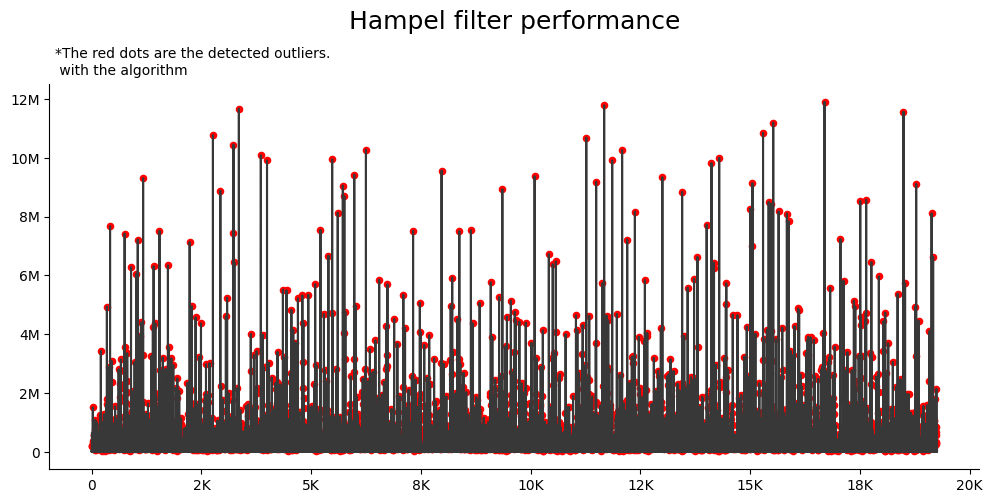

In [115]:
fig, ax = plt.subplots(1)

ax.plot(test_col, color= THEME_COLORS[0])
ax.scatter(hampel_indices, test_col[hampel_indices], s= 20, c= THEME_COLORS[1])

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


fig.set_size_inches(12, 5)
fig.text(.13, .9, "*The red dots are the detected outliers.\n with the algorithm")

ax.set_title("Hampel filter performance", fontsize= 18, pad= 40)
plt.savefig("../plots/hampel_filter_performance.svg")
plt.show()

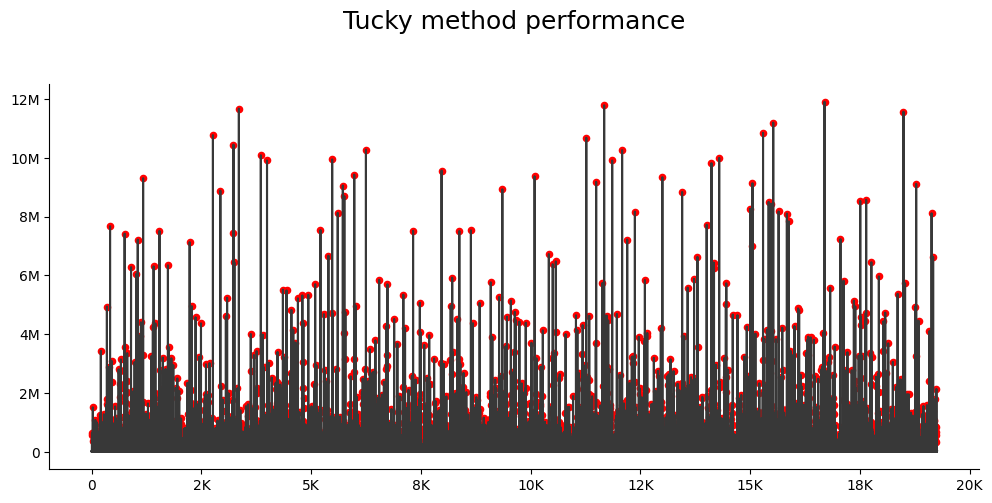

In [107]:
fig, ax = plt.subplots(1)

ax.plot(test_col, color= THEME_COLORS[0])
ax.scatter(tucky_indices, test_col[tucky_indices], s= 20, c= THEME_COLORS[1])

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(12, 5)
ax.set_title("Tucky method performance", fontsize= 18, pad= 40)
plt.savefig("../plots/tucky_method_performance.svg")
plt.show()

In [108]:
test_col

array([ 7222,  6773, 45177, ...,   879,  9409, 27696], dtype=int64)

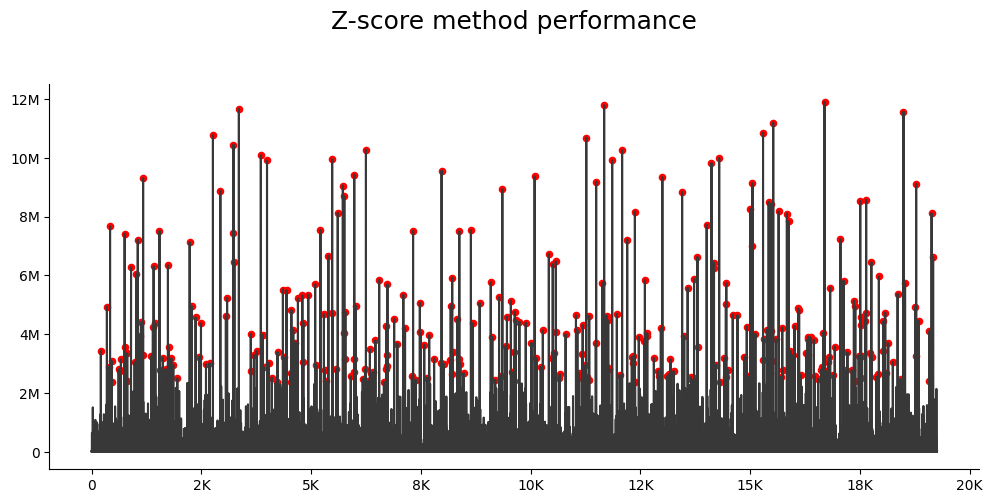

In [109]:
fig, ax = plt.subplots(1)

ax.scatter(z_score_indices, test_col[z_score_indices], s= 20, c= THEME_COLORS[1])
ax.plot(test_col, color= THEME_COLORS[0])

ax.ticklabel_format(style='plain')

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_size_inches(12, 5)

ax.set_title("Z-score method performance", fontsize= 18, pad= 40)
plt.savefig("../plots/z_score_performance.svg")
plt.show()